## LAPTOP PRICE PREDICTION

Problem statement:
The aim of this project is to predict the price of a laptop based on its features like RAM, processor, and storage.We use machine learning to find patterns between laptop specifications and their prices.
This helps in estimating the correct price of a laptop easily.

Import Libraries

In [21]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Saving Model
import pickle


Data Load

In [22]:
# Load Dataset
df = pd.read_csv("Laptop_price.csv")

print("Dataset Loaded Successfully")



Dataset Loaded Successfully


Data Understanding

In [23]:
print(df.head())

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  


In [24]:
print(df.tail())


      Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
995      HP         3.343584         4              1000    12.587095   
996    Dell         2.780555         8               256    12.679356   
997    Dell         3.200569         4               512    12.666315   
998    Asus         1.604182         8               256    11.215581   
999  Lenovo         1.711980         4               256    16.561498   

       Weight         Price  
995  3.162399  31593.668017  
996  3.750265   9149.521832  
997  3.392612  16552.404779  
998  3.857613   9407.473459  
999  3.440883   8807.696702  


In [25]:
print("Shape:", df.shape)

Shape: (1000, 7)


In [26]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB
None


In [27]:
print(df.describe())

       Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.000000        256.000000    11.012111   
25%           2.089246     8.000000        256.000000    12.635523   
50%           2.760885    16.000000        512.000000    14.099643   
75%           3.362610    32.000000       1000.000000    15.528590   
max           3.998534    32.000000       1000.000000    16.985737   

            Weight         Price  
count  1000.000000   1000.000000  
mean      3.466919  19604.187963  
std       0.866541   9406.064880  
min       2.000560   8570.012950  
25%       2.717211  10114.012948  
50%       3.464630  17287.241878  
75%       4.212583  31566.214754  
max       4.990728  33503.935037  


Data Preprocessing

Handle Null Values

In [28]:
print(df.isnull().sum())

# Drop null values (or use fillna if needed)
df = df.dropna()


Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


Remove Duplicates

In [29]:
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate Rows: 0


Remove unnecessary columns

In [30]:
# If there is an ID column
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)


Data type conversion

In [31]:
# Convert categorical columns to numerical
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])


Feature engineering/transformation

In [32]:
# Example: Creating new feature
# df['Total_Memory'] = df['Ram'] + df['Storage']


Feature Selection
Independent Variable (X)
Dependent Variable (y)

In [33]:
X = df.drop("Price", axis=1)
y = df["Price"]

print("Independent Features Shape:", X.shape)
print("Target Shape:", y.shape)


Independent Features Shape: (1000, 6)
Target Shape: (1000,)


Feature scaling

Standardization

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Normalization

In [35]:
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


Spiltting data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)


Training Size: (800, 6)
Testing Size: (200, 6)


Model Selection & Training

1. Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


2.Support Vector Machine (SVM)

In [38]:
svm = SVR()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)


3. Decision Tree

In [39]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


4. Random Forest

In [40]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


Polynomial regression

In [41]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

y_pred_poly = poly_model.predict(X_test_p)


Model Evaluation

In [42]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n---- {model_name} ----")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))


In [43]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test_p, y_pred_poly, "Polynomial Regression")



---- Linear Regression ----
MAE: 145.27235007959635
MSE: 31969.582469869227
RMSE: 178.8003984052307
R2 Score: 0.9996478987127725

---- SVM ----
MAE: 7925.300530180735
MSE: 94436635.20110145
RMSE: 9717.851367514399
R2 Score: -0.04009055629944602

---- Decision Tree ----
MAE: 219.17223765661288
MSE: 75130.96211588122
RMSE: 274.10027748231346
R2 Score: 0.999172535065274

---- Random Forest ----
MAE: 167.7472471139204
MSE: 41447.09539821881
RMSE: 203.5855972268638
R2 Score: 0.9995435168521418

---- Polynomial Regression ----
MAE: 148.35199395830097
MSE: 33171.98474047542
RMSE: 182.1317785024772
R2 Score: 0.9996346558939885


Model prediction

In [44]:
sample = X_test[0].reshape(1, -1)
prediction = rf.predict(sample)

print("Predicted Laptop Price:", prediction)


Predicted Laptop Price: [10559.45007867]


Save model & scaler

save best model

In [45]:
import pickle

# Save Linear Regression Model
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(lr, file)

print("Linear Regression Model Saved Successfully!")



Linear Regression Model Saved Successfully!


save scaler

In [46]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler Saved Successfully!")


Scaler Saved Successfully!


Load model and scaler later

In [47]:
# Load Model
with open("linear_regression_model.pkl", "rb") as file:
    model = pickle.load(file)

# Load Scaler
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)


Actual vs predicted graph

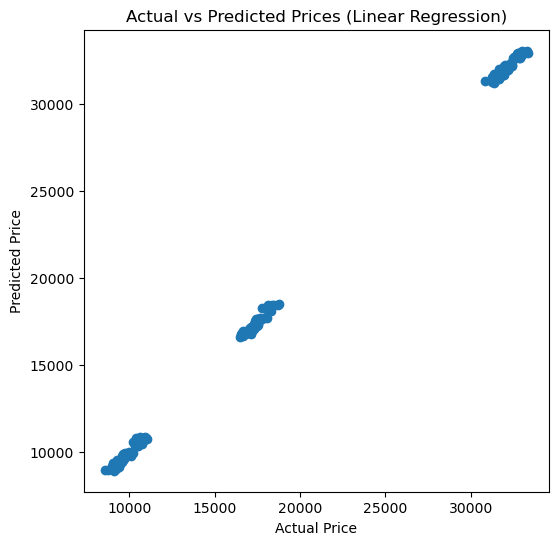

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()
